POSTTEST 8

NAMA : Millania Zahroh

Nim  : 2009106140

In [41]:
import tensorflow as tf
import tensorflow.keras.datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [42]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tfds.fashion_mnist.load_data()

In [43]:
print(f'panjang x train:{len(x_train_raw)}',
      f'panjang y train:{len(y_train_raw)}', 
      f'panjang x test:{len(x_test_raw)}', 
      f'panjang y test:{len(y_test_raw)}',
sep='\n')

panjang x train:60000
panjang y train:60000
panjang x test:10000
panjang y test:10000


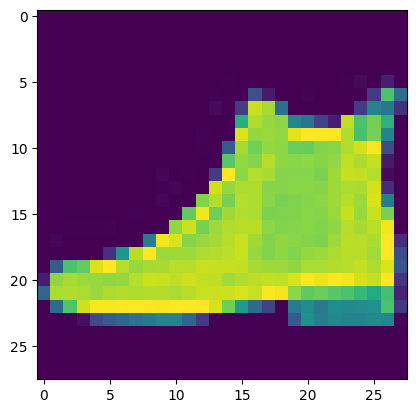

In [44]:
plt.imshow(x_test_raw[123])

In [45]:
num_class = len(np.unique(y_train_raw))
y_train = tf.keras.utils.to_categorical(y_train_raw, num_class)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_class)

In [46]:
x_train_raw.shape

(60000, 28, 28)

In [47]:
x_train = tf.reshape(x_train_raw,[60000, 784])
x_test = tf.reshape(x_test_raw,[10000, 784])

In [48]:
type(x_train)

tensorflow.python.framework.ops.EagerTensor

In [49]:
x_train = tf.cast(x_train, tf.float32)/255
x_test = tf.cast(x_test, tf.float32)/255

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim = 784),
     tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(num_class, activation='softmax')
])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [54]:
history = model.fit(
    x_train, y_train,
    epochs=25, steps_per_epoch=5,
    verbose=2,
    validation_data=(x_test, y_test)
)

Epoch 1/25
5/5 - 8s - loss: 0.4693 - accuracy: 0.8408 - val_loss: 0.4951 - val_accuracy: 0.8284 - 8s/epoch - 2s/step
Epoch 2/25
5/5 - 3s - loss: 0.4636 - accuracy: 0.8420 - val_loss: 0.4899 - val_accuracy: 0.8288 - 3s/epoch - 596ms/step
Epoch 3/25
5/5 - 3s - loss: 0.4580 - accuracy: 0.8436 - val_loss: 0.4850 - val_accuracy: 0.8304 - 3s/epoch - 605ms/step
Epoch 4/25
5/5 - 3s - loss: 0.4526 - accuracy: 0.8453 - val_loss: 0.4805 - val_accuracy: 0.8317 - 3s/epoch - 566ms/step
Epoch 5/25
5/5 - 3s - loss: 0.4480 - accuracy: 0.8469 - val_loss: 0.4767 - val_accuracy: 0.8318 - 3s/epoch - 503ms/step
Epoch 6/25
5/5 - 3s - loss: 0.4433 - accuracy: 0.8479 - val_loss: 0.4732 - val_accuracy: 0.8316 - 3s/epoch - 544ms/step
Epoch 7/25
5/5 - 3s - loss: 0.4392 - accuracy: 0.8495 - val_loss: 0.4708 - val_accuracy: 0.8321 - 3s/epoch - 519ms/step
Epoch 8/25
5/5 - 3s - loss: 0.4359 - accuracy: 0.8499 - val_loss: 0.4673 - val_accuracy: 0.8335 - 3s/epoch - 512ms/step
Epoch 9/25
5/5 - 3s - loss: 0.4322 - accura

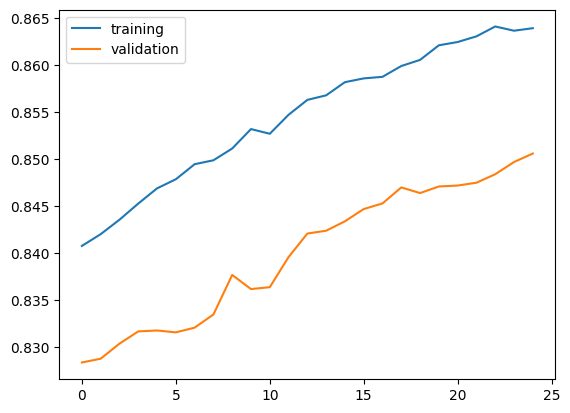

In [55]:
nilai_x = range(len(history.history['accuracy']))
plt.plot(nilai_x, history.history['accuracy'], label = 'training')
plt.plot(nilai_x, history.history['val_accuracy'], label = 'validation')
plt.legend()
plt.show()

In [56]:
model.save('model/model.h5')

In [57]:
model_saved = tf.keras.models.load_model('model/model.h5')
model_saved.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [58]:
model_saved.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 7s 2ms/step - loss: 0.4258 - accuracy: 0.8506


[0.4258335530757904, 0.850600004196167]

In [59]:
hasil = model_saved.predict(x_test)

313/313 [==============================] - 7s 2ms/step


In [60]:
x_train.shape

TensorShape([60000, 784])

In [61]:
np.unique(y_train_raw)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [62]:
tf.argmax(hasil[123]).numpy()

9

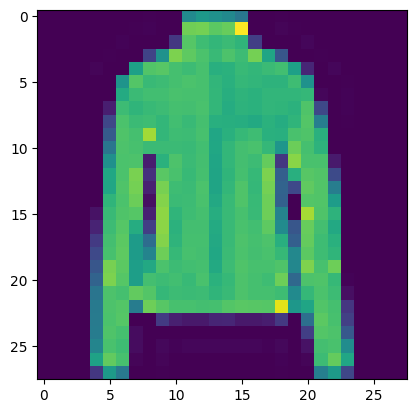

In [63]:
plt.imshow(x_test_raw[1234])

In [64]:
hasil.shape

(10000, 10)

In [65]:
hasil[2]

array([5.3983709e-05, 9.9986243e-01, 3.9232636e-06, 3.9272785e-05,
       2.7889504e-05, 1.4701410e-08, 9.0580070e-06, 2.1466466e-10,
       3.4202508e-06, 1.1643343e-10], dtype=float32)